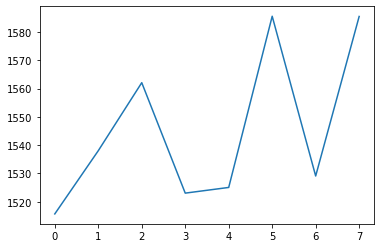

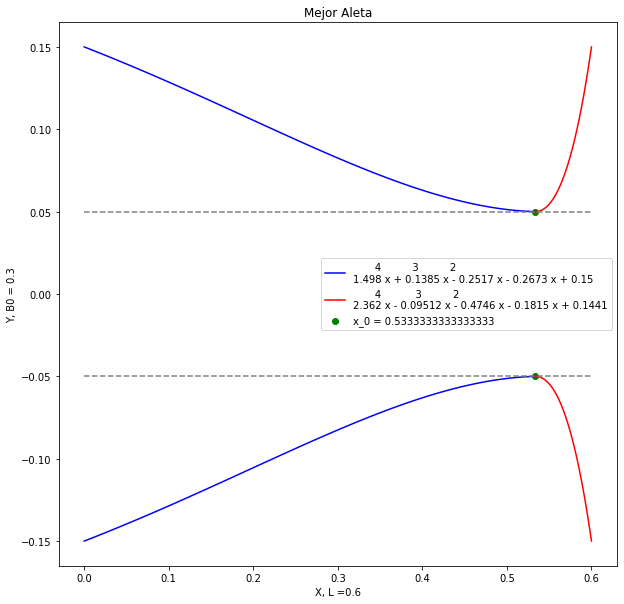

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


# Sección de parámetros de entrada
h = 58.0
k = 10000.0

B0 = 0.3
Bn = 0.3
L = 0.6
l = 0.36
b = 0.1
hk = h/k  # Parámetro h/k
theta0 = 10.0
thetan = 10.0


# parámetros adicionales
C_material = 3.0
C_manufactura = 2.0


N = 30   # Número de nodos

x = np.linspace(0,L,N)
delta = x[1]-x[0]
x00 = np.linspace(0,L,10)

optimal_fins = []

for x0 in x00[1:9]:
    # espacios linealesque permiten graficar la aleta resultante
    xi = np.linspace(0,x0,100)
    xd = np.linspace(x0,L,100)
    bb = np.ones(len(x))*b/2



    # Rango para la exploracion de diferentes polinomios 

    rangoxi = np.linspace(0,x0,10) # Rango en x del polinomio para x <  x0
    rangoyi = np.linspace(b/2,B0/2,10) # Rango en y del polinomio para x <  x0

    rangoxd = np.linspace(x0,L,10)  # Rango en x del polinomio para x >  x0
    rangoyd = np.linspace(b/2,Bn/2,10) # Rango en y del polinomio para x >  x0

    # Coeficientes polinomios de 2 orden 
    coef_polinomios_izquierda_2r = []
    coef_polinomios_derecha_2r = []


    for i in rangoxi:
        i0 = np.array([0.0, i, x0])
        for j in rangoyi: 
            yi0 = np.array([B0/2, j , b/2])
            zi0 = np.polyfit(i0, yi0, 2, full=False)
            p0 = np.poly1d(zi0)
            if abs((p0(x0+delta)-p0(x0-delta))/(2*delta)) <= 0.05 and min(p0(xi))>=b/2:
                #coef_polinomios.append([p0[3],p0[2],p0[1],p0[0]])
                coef_polinomios_izquierda_2r.append(p0)

    for i in rangoxd:
        i0 = np.array([x0, i, L])
        for j in rangoyd: 
            yi0 = np.array([b/2, j , Bn/2])
            zi0 = np.polyfit(i0, yi0, 2, full=False)
            p0 = np.poly1d(zi0)
            if abs((p0(x0+delta)-p0(x0-delta))/(2*delta)) <= 0.05 and min(p0(xd))>=b/2:
                #coef_polinomios.append([p0[3],p0[2],p0[1],p0[0]])
                coef_polinomios_derecha_2r.append(p0)

    # Coeficientes polinomios de 3er orden 
    coef_polinomios_izquierda_3r = []
    coef_polinomios_derecha_3r = []


    for i in rangoxi:
        i0 = np.array([0.0, i, x0])
        for j in rangoyi: 
            yi0 = np.array([B0/2, j , b/2])
            zi0 = np.polyfit(i0, yi0, 3, full=False)
            p0 = np.poly1d(zi0)
            if abs((p0(x0+delta)-p0(x0-delta))/(2*delta)) <= 0.05 and min(p0(xi))>=b/2:
                #coef_polinomios.append([p0[3],p0[2],p0[1],p0[0]])
                coef_polinomios_izquierda_3r.append(p0)

    for i in rangoxd:
        i0 = np.array([x0, i, L])
        for j in rangoyd: 
            yi0 = np.array([b/2, j , Bn/2])
            zi0 = np.polyfit(i0, yi0, 3, full=False)
            p0 = np.poly1d(zi0)
            if abs((p0(x0+delta)-p0(x0-delta))/(2*delta)) <= 0.05 and min(p0(xd))>=b/2:
                #coef_polinomios.append([p0[3],p0[2],p0[1],p0[0]])
                coef_polinomios_derecha_3r.append(p0)


    # Coeficientes polinomios de 4er orden 
    coef_polinomios_izquierda_4r = []
    coef_polinomios_derecha_4r = []


    for i in rangoxi:
        i0 = np.array([0.0, i, x0])
        for j in rangoyi: 
            yi0 = np.array([B0/2, j , b/2])
            zi0 = np.polyfit(i0, yi0, 4, full=False)
            p0 = np.poly1d(zi0)
            if abs((p0(x0+delta)-p0(x0-delta))/(2*delta)) <= 0.05 and min(p0(xi))>=b/2:
                #coef_polinomios.append([p0[3],p0[2],p0[1],p0[0]])
                coef_polinomios_izquierda_4r.append(p0)

    for i in rangoxd:
        i0 = np.array([x0, i, L])
        for j in rangoyd: 
            yi0 = np.array([b/2, j , Bn/2])
            zi0 = np.polyfit(i0, yi0, 4, full=False)
            p0 = np.poly1d(zi0)
            if abs((p0(x0+delta)-p0(x0-delta))/(2*delta)) <= 0.05 and min(p0(xd))>=b/2:
                #coef_polinomios.append([p0[3],p0[2],p0[1],p0[0]])
                coef_polinomios_derecha_4r.append(p0)


    aletas = []
    aletas_2r = []
    for i in range(0,len(coef_polinomios_izquierda_2r)):
        for j in range(0,len(coef_polinomios_derecha_2r)):
            aletas_2r.append([coef_polinomios_izquierda_2r[i],coef_polinomios_derecha_2r[j]])
            aletas.append([coef_polinomios_izquierda_2r[i],coef_polinomios_derecha_2r[j]])




    aletas_3r = []
    for i in range(0,len(coef_polinomios_izquierda_3r)):
        for j in range(0,len(coef_polinomios_derecha_3r)):
            aletas_3r.append([coef_polinomios_izquierda_3r[i],coef_polinomios_derecha_3r[j]])
            aletas.append([coef_polinomios_izquierda_3r[i],coef_polinomios_derecha_3r[j]])



    aletas_4r = []
    for i in range(0,len(coef_polinomios_izquierda_4r)):
        for j in range(0,len(coef_polinomios_derecha_4r)):
            aletas_4r.append([coef_polinomios_izquierda_4r[i],coef_polinomios_derecha_4r[j]])
            aletas.append([coef_polinomios_izquierda_4r[i],coef_polinomios_derecha_4r[j]])


    Area = np.zeros(N)
    B = np.zeros(N)
    dB = np.zeros(N)
    P = np.zeros(N)
    dArea = np.zeros(N)

    alpha = np.zeros(N)
    beta = np.zeros(N)
    gamma = np.zeros(N)

    Atlas = np.zeros((N-2,N-2))  # Matriz De coeficientes alpha, Beta, Gamma
    polo = np.zeros((N-2,1)) # Vector columna 

    optimizar = []

    for nn in range(0,len(aletas)):
        for i in range(0,N):
            if i*delta <= x0:
                B[i] = aletas[nn][0](delta*i)
                dArea[i] = (l/delta)*(aletas[nn][0](delta*i+delta)-aletas[nn][0](delta*i-delta))
            else:
                B[i] = aletas[0][1](delta*i)
                dArea[i] = (l/delta)*(aletas[nn][1](delta*i+delta)-aletas[nn][1](delta*i-delta))

            Area[i] = 2*l*B[i]
            P[i] = 2*(l+2*B[i])
            alpha[i] = (Area[i]/(delta**2))+(dArea[i]*(1/(2*delta)))
            beta[i] = (Area[i]/(delta**2))-(dArea[i]*(1/(2*delta)))
            gamma[i] = (-2*Area[i]/(delta**2))-(hk*P[i])



        for i in range(0,N-2):
            for j in range(0,N-2):
                if (i == j) and (i!=0 and i!=N-3) :
                    Atlas[i,j-1] = beta[i+1]
                    Atlas[i,j+1] = alpha[i+1]
                if (i == j):
                    Atlas[i,j] = gamma[i+1]
                if (i == j) and (i==0) :
                    Atlas[i,j+1] = alpha[i+1]
                if (i == j) and (i==N-3) :
                    Atlas[i,j-1] = beta[i+1]




        polo[0,0] = -theta0*beta[1]
        polo[N-3,0] = -thetan*alpha[N-2]

        Temp_theta = np.dot(np.linalg.inv(Atlas),polo)
        Temp_theta = np.insert(Temp_theta,0,theta0)
        Temp_theta = np.insert(Temp_theta,N-1,thetan)
        Q = sum(delta*Temp_theta*P)*h
        Valor_Material = C_material*max(Area)*L
        Vol_Removido = sum(delta*(max(Area)-Area))
        Valor_manufactura = C_manufactura*Vol_Removido
        optimizar.append( Q/(Valor_Material+Valor_manufactura))
    mejor_aleta = np.where(optimizar==max(optimizar))[0][0]
    optimal_fins.append([aletas[mejor_aleta][0],aletas[mejor_aleta][1],optimizar[mejor_aleta],xi,xd])
    

    
graph = []
for i in range(0,len(optimal_fins)):
    graph.append(optimal_fins[i][2])
plt.figure()
plt.plot(graph)

aleta_ganadora = np.where(graph==max(graph))[0][0]




plt.figure(figsize=(10,10))
plt.plot(xi,optimal_fins[aleta_ganadora][0](optimal_fins[aleta_ganadora][3]),c = 'blue',label='{}'.format(optimal_fins[aleta_ganadora][0]))
plt.plot(xd,optimal_fins[aleta_ganadora][1](optimal_fins[aleta_ganadora][4]),c = 'red',label='{}'.format(optimal_fins[aleta_ganadora][1]))
plt.plot(xi,-optimal_fins[aleta_ganadora][0](optimal_fins[aleta_ganadora][3]),c = 'blue')
plt.plot(xd,-optimal_fins[aleta_ganadora][1](optimal_fins[aleta_ganadora][4]),c = 'red')
plt.plot(x,bb,ls ='--',c = 'gray')
plt.plot(x,-bb,ls ='--',c= 'gray')
plt.scatter(x0,b/2,c = 'green',label='x_0 = {}'.format(x0))
plt.scatter(x0,-b/2,c= 'green')
plt.title('Mejor Aleta')
plt.xlabel('X, L ={}'.format(L))
plt.ylabel('Y, B0 = {}'.format(B0))
plt.legend()


# Ejemplo a resolver

----------------------------------------------------------------
------------------Polinomios de 2do orden-----------------------
Los polinomios para x < x0 :
        2
0.2009 x - 0.2054 x + 0.1
-----------------------------------------
Los polinomios para x > x0 :
         2
0.01697 x + 0.03188 x + 0.03731
         2
0.01481 x + 0.03186 x + 0.04044
         2
0.01266 x + 0.03183 x + 0.04358
        2
0.0105 x + 0.03181 x + 0.04671
          2
0.008347 x + 0.03178 x + 0.04984
         2
0.03516 x + 0.00625 x + 0.04188
         2
0.07031 x - 0.05 x + 0.05875
         2
0.03516 x + 0.00625 x + 0.04187
         2
0.07813 x - 0.0625 x + 0.0625
         2
0.03906 x - 1.545e-16 x + 0.04375
          2
0.007749 x + 0.01885 x + 0.04122
          2
0.009243 x + 0.01993 x + 0.04055
         2
0.01074 x + 0.02102 x + 0.03988
         2
0.01223 x + 0.0221 x + 0.0392
         2
0.01372 x + 0.02318 x + 0.03853
         2
0.01522 x + 0.02426 x + 0.03786
         2
0.01671 x + 0.02535 x + 0.03719
    

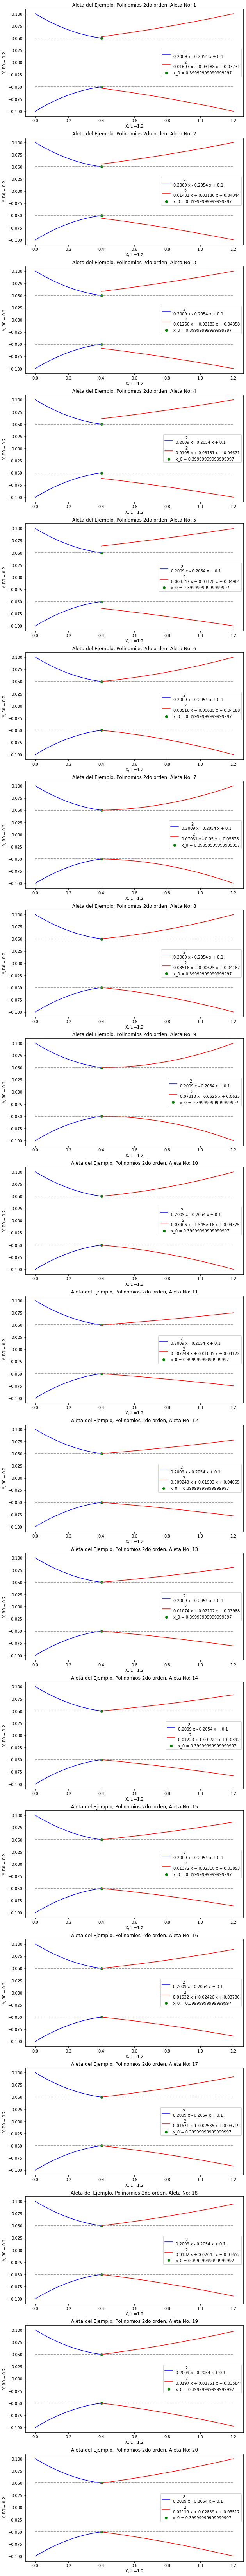

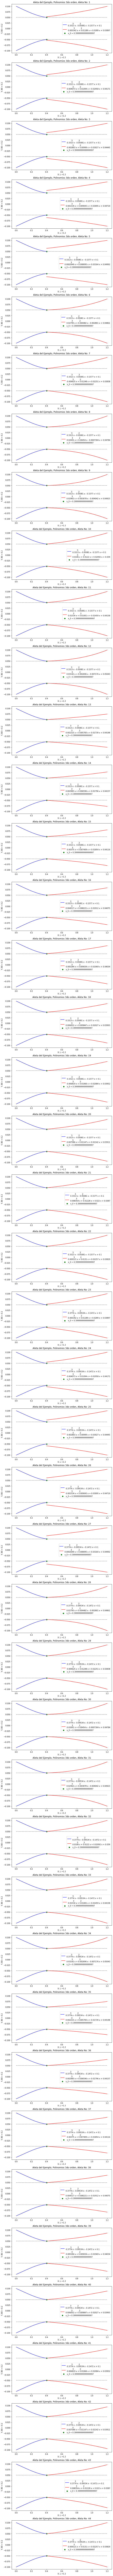

<Figure size 720x0 with 0 Axes>

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


# Sección de parámetros de entrada
h = 1000.0
k = 58.0

B0 = 0.2
Bn = 0.2
L = 1.2
l = 0.36
b = 0.1
hk = h/k  # Parámetro h/k
theta0 = 100.0
thetan = 10.0


# parámetros adicionales
C_material = 20.0
C_manufactura = 30.0

x0 = L/3;

N = 30   # Número de nodos

x = np.linspace(0,L,N)
delta = x[1]-x[0]

# espacios linealesque permiten graficar la aleta resultante
xi = np.linspace(0,x0,100)
xd = np.linspace(x0,L,100)
bb = np.ones(len(x))*b/2



# Rango para la exploracion de diferentes polinomios 

rangoxi = np.linspace(0,x0,10) # Rango en x del polinomio para x <  x0
rangoyi = np.linspace(b/2,B0/2,10) # Rango en y del polinomio para x <  x0

rangoxd = np.linspace(x0,L,10)  # Rango en x del polinomio para x >  x0
rangoyd = np.linspace(b/2,Bn/2,10) # Rango en y del polinomio para x >  x0

# Coeficientes polinomios de 2 orden 
coef_polinomios_izquierda_2r = []
coef_polinomios_derecha_2r = []


for i in rangoxi:
    i0 = np.array([0.0, i, x0])
    for j in rangoyi: 
        yi0 = np.array([B0/2, j , b/2])
        zi0 = np.polyfit(i0, yi0, 2, full=False)
        p0 = np.poly1d(zi0)
        if abs((p0(x0+delta)-p0(x0-delta))/(2*delta)) <= 0.05 and min(p0(xi))>=b/2 and min(p0(xi))<=(b/2)*1.05:
            #coef_polinomios.append([p0[3],p0[2],p0[1],p0[0]])
            coef_polinomios_izquierda_2r.append(p0)
            
for i in rangoxd:
    i0 = np.array([x0, i, L])
    for j in rangoyd: 
        yi0 = np.array([b/2, j , Bn/2])
        zi0 = np.polyfit(i0, yi0, 2, full=False)
        p0 = np.poly1d(zi0)
        if abs((p0(x0+delta)-p0(x0-delta))/(2*delta)) <= 0.05 and min(p0(xd))>=b/2 and min(p0(xi))<=(b/2)*1.05:
            #coef_polinomios.append([p0[3],p0[2],p0[1],p0[0]])
            coef_polinomios_derecha_2r.append(p0)

# Coeficientes polinomios de 3er orden 
coef_polinomios_izquierda_3r = []
coef_polinomios_derecha_3r = []


for i in rangoxi:
    i0 = np.array([0.0, i, x0])
    for j in rangoyi: 
        yi0 = np.array([B0/2, j , b/2])
        zi0 = np.polyfit(i0, yi0, 3, full=False)
        p0 = np.poly1d(zi0)
        if abs((p0(x0+delta)-p0(x0-delta))/(2*delta)) <= 0.05 and min(p0(xi))>=b/2 and min(p0(xi))<=(b/2)*1.05:
            #coef_polinomios.append([p0[3],p0[2],p0[1],p0[0]])
            coef_polinomios_izquierda_3r.append(p0)
            
for i in rangoxd:
    i0 = np.array([x0, i, L])
    for j in rangoyd: 
        yi0 = np.array([b/2, j , Bn/2])
        zi0 = np.polyfit(i0, yi0, 3, full=False)
        p0 = np.poly1d(zi0)
        if abs((p0(x0+delta)-p0(x0-delta))/(2*delta)) <= 0.05 and min(p0(xd))>=b/2 and min(p0(xi))<=(b/2)*1.05:
            #coef_polinomios.append([p0[3],p0[2],p0[1],p0[0]])
            coef_polinomios_derecha_3r.append(p0)
            
            
# Coeficientes polinomios de 4er orden 
coef_polinomios_izquierda_4r = []
coef_polinomios_derecha_4r = []


for i in rangoxi:
    i0 = np.array([0.0, i, x0])
    for j in rangoyi: 
        yi0 = np.array([B0/2, j , b/2])
        zi0 = np.polyfit(i0, yi0, 4, full=False)
        p0 = np.poly1d(zi0)
        if abs((p0(x0+delta)-p0(x0-delta))/(2*delta)) <= 0.05 and min(p0(xi))==b/2:
            #coef_polinomios.append([p0[3],p0[2],p0[1],p0[0]])
            coef_polinomios_izquierda_4r.append(p0)
            
for i in rangoxd:
    i0 = np.array([x0, i, L])
    for j in rangoyd: 
        yi0 = np.array([b/2, j , Bn/2])
        zi0 = np.polyfit(i0, yi0, 4, full=False)
        p0 = np.poly1d(zi0)
        if abs((p0(x0+delta)-p0(x0-delta))/(2*delta)) <= 0.05 and min(p0(xd))==b/2:
            #coef_polinomios.append([p0[3],p0[2],p0[1],p0[0]])
            coef_polinomios_derecha_4r.append(p0)
            

print('----------------------------------------------------------------')              
print('------------------Polinomios de 2do orden-----------------------')
print('Los polinomios para x < x0 :')
for i in range(0,len(coef_polinomios_izquierda_2r)):
    print(coef_polinomios_izquierda_2r[i])
print('-----------------------------------------')
print('Los polinomios para x > x0 :')
for i in range(0,len(coef_polinomios_derecha_2r)):
    print(coef_polinomios_derecha_2r[i])
print('----------------------------------------------------------------')  
print('----------------------------------------------------------------') 
print('                                                                ')
print('                                                                ')
aletas = []
aletas_2r = []
plt.figure(1,figsize=(10,len(coef_polinomios_izquierda_2r)*len(coef_polinomios_derecha_2r)*6))
cto = 1
for i in range(0,len(coef_polinomios_izquierda_2r)):
    for j in range(0,len(coef_polinomios_derecha_2r)):
        plt.subplot(len(coef_polinomios_izquierda_2r)*len(coef_polinomios_derecha_2r),1,cto)
        plt.plot(xi,coef_polinomios_izquierda_2r[i](xi),c = 'blue',label='{}'.format(coef_polinomios_izquierda_2r[i]))
        plt.plot(xd,coef_polinomios_derecha_2r[j](xd),c = 'red',label='{}'.format(coef_polinomios_derecha_2r[j]))
        plt.plot(xi,-coef_polinomios_izquierda_2r[i](xi),c = 'blue')
        plt.plot(xd,-coef_polinomios_derecha_2r[j](xd),c = 'red')
        plt.plot(x,bb,ls ='--',c = 'gray')
        plt.plot(x,-bb,ls ='--',c= 'gray')
        plt.scatter(x0,b/2,c = 'green',label='x_0 = {}'.format(x0))
        plt.scatter(x0,-b/2,c= 'green')
        plt.title('Aleta del Ejemplo, Polinomios 2do orden, Aleta No: {}'.format(cto))
        plt.xlabel('X, L ={}'.format(L))
        plt.ylabel('Y, B0 = {}'.format(B0))
        plt.legend()
        cto = cto+1
        aletas_2r.append([coef_polinomios_izquierda_2r[i],coef_polinomios_derecha_2r[j]])
        aletas.append([coef_polinomios_izquierda_2r[i],coef_polinomios_derecha_2r[j]])
    
    
            
print('----------------------------------------------------------------')              
print('------------------Polinomios de 3er orden-----------------------')
print('Los polinomios para x < x0 :')
for i in range(0,len(coef_polinomios_izquierda_3r)):
    print(coef_polinomios_izquierda_3r[i])
print('-----------------------------------------')
print('Los polinomios para x > x0 :')
for i in range(0,len(coef_polinomios_derecha_3r)):
    print(coef_polinomios_derecha_3r[i])
print('----------------------------------------------------------------')  
print('----------------------------------------------------------------') 
print('                                                                ')
print('                                                                ')

aletas_3r = []
plt.figure(2,figsize=(10,len(coef_polinomios_izquierda_3r)*len(coef_polinomios_derecha_3r)*6))
cto = 1
for i in range(0,len(coef_polinomios_izquierda_3r)):
    for j in range(0,len(coef_polinomios_derecha_3r)):
        plt.subplot(len(coef_polinomios_izquierda_3r)*len(coef_polinomios_derecha_3r),1,cto)
        plt.plot(xi,coef_polinomios_izquierda_3r[i](xi),c = 'blue',label='{}'.format(coef_polinomios_izquierda_3r[i]))
        plt.plot(xd,coef_polinomios_derecha_3r[j](xd),c = 'red',label='{}'.format(coef_polinomios_derecha_3r[j]))
        plt.plot(xi,-coef_polinomios_izquierda_3r[i](xi),c = 'blue')
        plt.plot(xd,-coef_polinomios_derecha_3r[j](xd),c = 'red')
        plt.plot(x,bb,ls ='--',c = 'gray')
        plt.plot(x,-bb,ls ='--',c= 'gray')
        plt.scatter(x0,b/2,c = 'green',label='x_0 = {}'.format(x0))
        plt.scatter(x0,-b/2,c= 'green')
        plt.title('Aleta del Ejemplo, Polinomios 3do orden, Aleta No: {}'.format(cto))
        plt.xlabel('X, L ={}'.format(L))
        plt.ylabel('Y, B0 = {}'.format(B0))
        plt.legend()
        cto = cto+1
        aletas_3r.append([coef_polinomios_izquierda_3r[i],coef_polinomios_derecha_3r[j]])
        aletas.append([coef_polinomios_izquierda_3r[i],coef_polinomios_derecha_3r[j]])
    
    
print('----------------------------------------------------------------')            
print('------------------Polinomios de 4er orden-----------------------')
print('Los polinomios para x < x0 :')
for i in range(0,len(coef_polinomios_izquierda_4r)):
    print(coef_polinomios_izquierda_4r[i])
print('-----------------------------------------')
print('Los polinomios para x > x0 :')
for i in range(0,len(coef_polinomios_derecha_4r)):
    print(coef_polinomios_derecha_4r[i])
print('----------------------------------------------------------------')  
print('----------------------------------------------------------------') 
print('                                                                ')
print('                                                                ')

aletas_4r = []
plt.figure(3,figsize=(10,len(coef_polinomios_izquierda_4r)*len(coef_polinomios_derecha_4r)*6))
cto = 1
for i in range(0,len(coef_polinomios_izquierda_4r)):
    for j in range(0,len(coef_polinomios_derecha_4r)):
        plt.subplot(len(coef_polinomios_izquierda_4r)*len(coef_polinomios_derecha_4r),1,cto)
        plt.plot(xi,coef_polinomios_izquierda_4r[i](xi),c = 'blue',label='{}'.format(coef_polinomios_izquierda_4r[i]))
        plt.plot(xd,coef_polinomios_derecha_4r[j](xd),c = 'red',label='{}'.format(coef_polinomios_derecha_4r[j]))
        plt.plot(xi,-coef_polinomios_izquierda_4r[i](xi),c = 'blue')
        plt.plot(xd,-coef_polinomios_derecha_4r[j](xd),c = 'red')
        plt.plot(x,bb,ls ='--',c = 'gray')
        plt.plot(x,-bb,ls ='--',c= 'gray')
        plt.scatter(x0,b/2,c = 'green',label='x_0 = {}'.format(x0))
        plt.scatter(x0,-b/2,c= 'green')
        plt.title('Aleta del Ejemplo, Polinomios 4do orden, Aleta No: {}'.format(cto))
        plt.xlabel('X, L ={}'.format(L))
        plt.ylabel('Y, B0 = {}'.format(B0))
        plt.legend()
        cto = cto+1
        aletas_4r.append([coef_polinomios_izquierda_4r[i],coef_polinomios_derecha_4r[j]])
        aletas.append([coef_polinomios_izquierda_4r[i],coef_polinomios_derecha_4r[j]])





### Forma 1

La mejor aleta es la No.  53 y corresponde a:
28


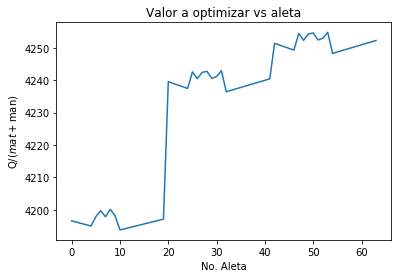

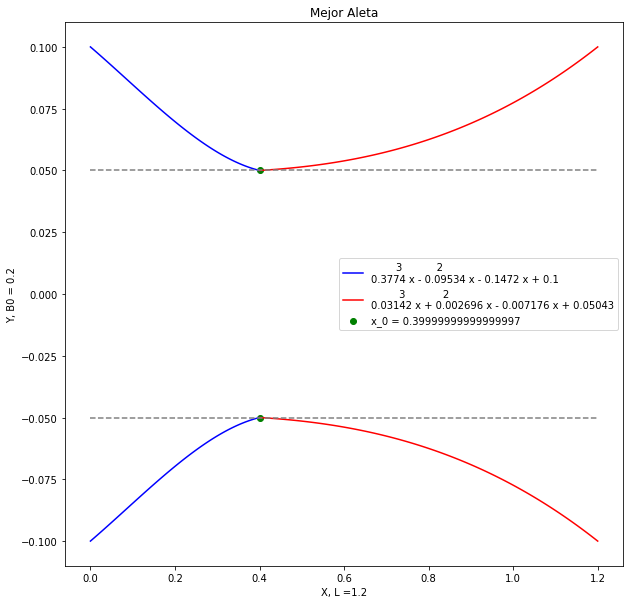

In [29]:
Area = np.zeros(N)
dArea = np.zeros(N)
B = np.zeros(N)
P = np.zeros(N)

alpha = np.zeros(N)
beta = np.zeros(N)
gamma = np.zeros(N)

Atlas = np.zeros((N-2,N-2))  # Matriz De coeficientes alpha, Beta, Gamma
polo = np.zeros((N-2,1)) # Vector columna 
optimizar = []

for nn in range(0,len(aletas)):
    for i in range(0,N):
        if i*delta <= x0:
            B[i] = aletas[nn][0](delta*i)
            dArea[i] = (l/delta)*(aletas[nn][0](delta*i+delta)-aletas[nn][0](delta*i-delta))
        else:
            B[i] = aletas[0][1](delta*i)
            dArea[i] = (l/delta)*(aletas[nn][1](delta*i+delta)-aletas[nn][1](delta*i-delta))

        Area[i] = 2*l*B[i]
        P[i] = 2*(l+2*B[i])
        alpha[i] = (Area[i]/(delta**2))+(dArea[i]*(1/(2*delta)))
        beta[i] = (Area[i]/(delta**2))-(dArea[i]*(1/(2*delta)))
        gamma[i] = (-2*Area[i]/(delta**2))-(hk*P[i])



    for i in range(0,N-2):
        for j in range(0,N-2):
            if (i == j) and (i!=0 and i!=N-3) :
                Atlas[i,j-1] = beta[i+1]
                Atlas[i,j+1] = alpha[i+1]
            if (i == j):
                Atlas[i,j] = gamma[i+1]
            if (i == j) and (i==0) :
                Atlas[i,j+1] = alpha[i+1]
            if (i == j) and (i==N-3) :
                Atlas[i,j-1] = beta[i+1]




    polo[0,0] = -theta0*beta[1]
    polo[N-3,0] = -thetan*alpha[N-2]

    Temp_theta = np.dot(np.linalg.inv(Atlas),polo)
    Temp_theta = np.insert(Temp_theta,0,theta0)
    Temp_theta = np.insert(Temp_theta,N-1,thetan)
    Q = sum(delta*Temp_theta*P)*h
    Valor_Material = C_material*max(Area)*L
    Vol_Removido = sum(delta*(max(Area)-Area))
    Valor_manufactura = C_manufactura*Vol_Removido
    optimizar.append( Q/(Valor_Material+Valor_manufactura))
    
plt.figure()
plt.plot(optimizar)
plt.title('Valor a optimizar vs aleta')
plt.ylabel('Q/($mat + $man)')
plt.xlabel('No. Aleta')

mejor_aleta = np.where(optimizar==max(optimizar))[0][0]
print('La mejor aleta es la No. ',mejor_aleta, 'y corresponde a:')
plt.figure(figsize=(10,10))
plt.plot(xi,aletas[mejor_aleta][0](xi),c = 'blue',label='{}'.format(aletas[mejor_aleta][0]))
plt.plot(xd,aletas[mejor_aleta][1](xd),c = 'red',label='{}'.format(aletas[mejor_aleta][1]))
plt.plot(xi,-aletas[mejor_aleta][0](xi),c = 'blue')
plt.plot(xd,-aletas[mejor_aleta][1](xd),c = 'red')
plt.plot(x,bb,ls ='--',c = 'gray')
plt.plot(x,-bb,ls ='--',c= 'gray')
plt.scatter(x0,b/2,c = 'green',label='x_0 = {}'.format(x0))
plt.scatter(x0,-b/2,c= 'green')
plt.title('Mejor Aleta')
plt.xlabel('X, L ={}'.format(L))
plt.ylabel('Y, B0 = {}'.format(B0))
plt.legend()

print(np.size(polo))

### Forma 2

La mejor aleta es la No.  4 y corresponde a:


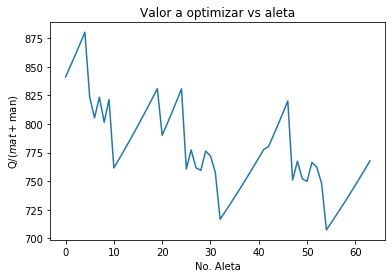

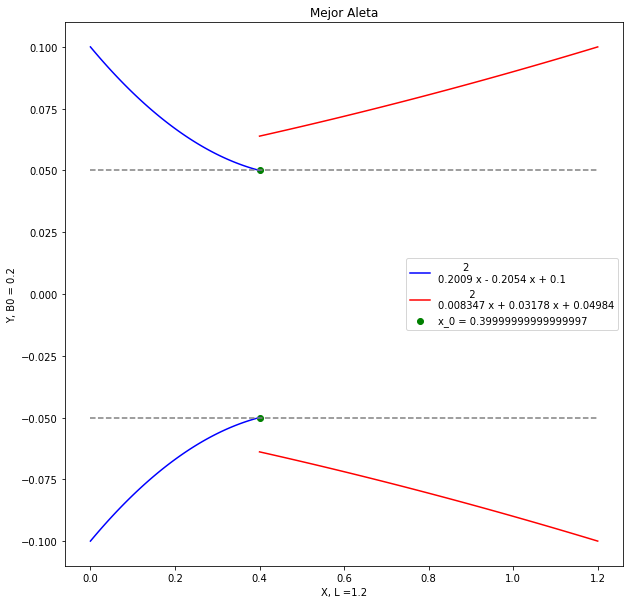

In [25]:
Area = np.zeros(N)
B = np.zeros(N)
dB = np.zeros(N)
P = np.zeros(N)

alpha = np.zeros(N)
beta = np.zeros(N)
gamma = np.zeros(N)

Atlas = np.zeros((N-2,N-2))  # Matriz De coeficientes alpha, Beta, Gamma
polo = np.zeros((N-2,1)) # Vector columna 

optimizar = []

for nn in range(0,len(aletas)):
    for i in range(0,N):
        if i*delta <= x0:
            B[i] = aletas[nn][0](delta*i)
            dB[i] = (aletas[nn][0](delta*i+delta)-aletas[nn][0](delta*i-delta))/(2*delta)
        else:
            B[i] = aletas[nn][1](delta*i)
            dB[i] = (aletas[nn][1](delta*i+delta)-aletas[nn][1](delta*i-delta))/(2*delta)


        Area[i] = 2*l*B[i]
        P[i] = 2*(l+2*B[i])
        alpha[i] = (l/delta)*dB[i]
        beta[i] = (-l/delta)*dB[i]
        gamma[i] = hk*P[i]

    for i in range(0,N-2):
        for j in range(0,N-2):
            if (i == j) and (i!=0 and i!=N-3) :
                Atlas[i,j-1] = beta[i+1]
                Atlas[i,j+1] = alpha[i+1]
            if (i == j):
                Atlas[i,j] = -gamma[i+1]
            if (i == j) and (i==0) :
                Atlas[i,j+1] = alpha[i+1]
            if (i == j) and (i==N-3) :
                Atlas[i,j-1] = beta[i+1]




    polo[0,0] = -theta0*beta[1]
    polo[N-3,0] = -thetan*alpha[N-2]

    Temp_theta = np.dot(np.linalg.inv(Atlas),polo)
    Temp_theta = np.insert(Temp_theta,0,theta0)
    Temp_theta = np.insert(Temp_theta,N-1,thetan)
    Q = sum(delta*Temp_theta*P)*h
    Valor_Material = C_material*max(Area)*L
    Vol_Removido = sum(delta*(max(Area)-Area))
    Valor_manufactura = C_manufactura*Vol_Removido
    optimizar.append( Q/(Valor_Material+Valor_manufactura))
plt.figure()
plt.plot(optimizar)
plt.title('Valor a optimizar vs aleta')
plt.ylabel('Q/($mat + $man)')
plt.xlabel('No. Aleta')

mejor_aleta = np.where(optimizar==max(optimizar))[0][0]
print('La mejor aleta es la No. ',mejor_aleta, 'y corresponde a:')
plt.figure(figsize=(10,10))
plt.plot(xi,aletas[mejor_aleta][0](xi),c = 'blue',label='{}'.format(aletas[mejor_aleta][0]))
plt.plot(xd,aletas[mejor_aleta][1](xd),c = 'red',label='{}'.format(aletas[mejor_aleta][1]))
plt.plot(xi,-aletas[mejor_aleta][0](xi),c = 'blue')
plt.plot(xd,-aletas[mejor_aleta][1](xd),c = 'red')
plt.plot(x,bb,ls ='--',c = 'gray')
plt.plot(x,-bb,ls ='--',c= 'gray')
plt.scatter(x0,b/2,c = 'green',label='x_0 = {}'.format(x0))
plt.scatter(x0,-b/2,c= 'green')
plt.title('Mejor Aleta')
plt.xlabel('X, L ={}'.format(L))
plt.ylabel('Y, B0 = {}'.format(B0))
plt.legend()

### Forma 3

In [12]:

T = np.zeros(N)
T[0] = theta0
T[1] = ((2*hk*l*T[0] + 4*hk*B[0]*T[0])*(delta**2)/(2*l))*1/(B[1]-B[0]) + T[0]
T[N-1] = thetan
for i in range(2,N-1):
    T[i] = ((2*hk*l*T[i-1] + 4*hk*B[i-1]*T[i-1])*(delta**2)/(2*l))*1/(B[i]-B[i-2]) + T[i-1]


In [1]:
2+2

4